# Agent & Tools

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-5-mini', temperature=0) # gpt-5-mini, gpt-4o-mini

In [8]:
model.invoke('걸그룹 Geenius 멤버를 알려줘') # gpt-5-mini

AIMessage(content='어떤 그룹을 말씀하시는 건지 조금만 더 알려주실래요? \n\n"Geenius"라고 하셨는데\n- 한국 걸그룹인 Geenius를 뜻하시는지, \n- 아니면 철자가 비슷한 다른 그룹(예: "Genius", "(G)I-DLE" 등)을 말하시는지, \n- 혹은 특정 데뷔 연도나 소속사·대표곡 같은 단서가 있는지 알려주시면 정확히 멤버 정보를 찾아 드릴게요.\n\n원하시면 제가 인터넷으로 검색해서 멤버 리스트·프로필·간단한 소개까지 찾아드리겠습니다. 어떤 방식으로 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 541, 'prompt_tokens': 17, 'total_tokens': 558, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYS6VTiBdyEByQbjA3sM2cr7Z5uYN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c0ac7d76-e406-47e7-9ee8-3175af3a0efd-0', usage_metadata={'input_tokens': 17, 'output_tokens': 541, 'total_tokens': 558, 'input_token_details

In [21]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o-mini', temperature=0) # gpt-5-mini, gpt-4o-mini

In [ ]:
model.invoke('걸그룹 Geenius 멤버를 알려줘') # gpt-4o-mini 

AIMessage(content='걸그룹 Geenius는 2023년에 데뷔한 그룹으로, 멤버들은 다음과 같습니다:\n\n1. **지유 (Jiyu)**\n2. **하린 (Harin)**\n3. **미래 (Mirae)**\n4. **소희 (Sohee)**\n5. **유나 (Yuna)**\n\n각 멤버는 다양한 매력과 개성을 가지고 있으며, 그룹의 음악과 활동에 기여하고 있습니다. 더 궁금한 점이 있으면 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 18, 'total_tokens': 132, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CYSIn9GfflEIWyBmvK7c2UvQFNKss', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--398de316-1fcf-4b3d-8541-afab53c312a0-0', usage_metadata={'input_tokens': 18, 'output_tokens': 114, 'total_tokens': 132, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outpu

→ gpt-4o-mini를 모델로 사용해서 invoke를 했는데, 할루시네이션 답변을 제공한다. 위 답벼은 실제 정보가 아니다.<br>
→ 그래서 우리는 wikipedia 에 대한 library를 활용해서 실제 같은 model 'gpt-4o-mini'로 검증<br>
→ 이를 Agent에 tools를 설정하여 올바른 정보를 응답할 수 있게 할 수 있다.


### Agent

In [12]:
!pip install wikipedia

  Using cached wikipedia-1.4.0-py3-none-any.whl
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.14.2-py3-none-any.whl (106 kB)
Using cached soupsieve-2.8-py3-none-any.whl (36 kB)

   ------------- -------------------------- 1/3 [beautifulsoup4]
   -------------------------- ------------- 2/3 [wikipedia]
   ---------------------------------------- 3/3 [wikipedia]



  DEPRECATION: Building 'wikipedia' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wikipedia'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × Building wheel for vllm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1946 lines of output]
      C:\Users\Playdata\AppData\Local\Temp\pip-build-env-cszy6dv0\overlay\Lib\site-packages\torch\_subclasses\functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
        cpu = _conversion_method_template(device=torch.device("cpu"

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
     ---------------------------------------- 10.8/10.8 MB 67.7 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cach

In [15]:
!pip install llm_math

  Using cached wikipedia-1.4.0-py3-none-any.whl
  Using cached llm_math-0.2.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached vllm-0.11.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached word2number-1.1-py3-none-any.whl
  Using cached antlr4_python3_runtime-4.11.1-py3-none-any.whl.metadata (291 bytes)
  Using cached Pebble-5.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached timeout_decorator-0.5.0-py3-none-any.whl
  Using cached latex2sympy2_llmmath-1.9.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata 

  error: subprocess-exited-with-error
  
  × Building wheel for vllm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1946 lines of output]
      C:\Users\Playdata\AppData\Local\Temp\pip-build-env-0zz5mskp\overlay\Lib\site-packages\torch\_subclasses\functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
        cpu = _conversion_method_template(device=torch.device("cpu"))
      vLLM only supports Linux platform (including WSL) and MacOS.Building on win32, so vLLM may not be able to run correctly
      C:\Users\Playdata\AppData\Local\Temp\pip-build-env-0zz5mskp\overlay\Lib\site-packages\setuptools_scm\_integration\version_inference.py:51: UserWarning: version of None already set
        warnings.warn(self.message)
      running bdist_wheel
      running build
      running build_py
      creating build\lib\vllm
      copyin

  Using cached llm_math-0.2.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached vllm-0.11.0.tar.gz (10.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached word2number-1.1-py3-none-any.whl
  Using cached antlr4_python3_runtime-4.11.1-py3-none-any.whl.metadata (291 bytes)
  Using cached Pebble-5.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached timeout_decorator-0.5.0-py3-none-any.whl
  Using cached latex2sympy2_llmmath-1.9.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached sentencepiece-0.2.1-cp312-cp3

  error: subprocess-exited-with-error
  
  × Building wheel for vllm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1946 lines of output]
      C:\Users\Playdata\AppData\Local\Temp\pip-build-env-f3d4exr1\overlay\Lib\site-packages\torch\_subclasses\functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
        cpu = _conversion_method_template(device=torch.device("cpu"))
      vLLM only supports Linux platform (including WSL) and MacOS.Building on win32, so vLLM may not be able to run correctly
      C:\Users\Playdata\AppData\Local\Temp\pip-build-env-f3d4exr1\overlay\Lib\site-packages\setuptools_scm\_integration\version_inference.py:51: UserWarning: version of None already set
        warnings.warn(self.message)
      running bdist_wheel
      running build
      running build_py
      creating build\lib\vllm
      copyin

In [16]:
!pip install numexpr

In [19]:
from langchain_classic.agents import AgentType, initialize_agent, load_tools

tools = load_tools(['wikipedia', 'llm-math'], llm=model)

agent = initialize_agent(
    tools,
    model,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose=True
)


In [20]:
agent.invoke('걸그룹 Geenius 멤버를 알려줘')



> Entering new AgentExecutor chain...
I need to find information about the members of the girl group Geenius. I'll search for this information on Wikipedia.  
Action: wikipedia  
Action Input: Geenius (girl group)  
Observation: Page: Geenius
Summary: Geenius (Korean: 지니어스; RR: Jinieoseu) is a South Korean girl group under HOMe. The group consists of five members: Yeyoung, Sion, Mika, Zoe, and Andamiro. They made their debut on January 5, 2024, with the digital single "Voyage".

Page: List of South Korean girl groups
Summary: South Korean girl groups refer to the all-female idol groups who are part of the K-pop industry. Korean girl groups have aided in the globalization of Korean culture. The Jeogori Sisters and The Kim Sisters have been noted as the origins of South Korean girl groups.



Page: List of girl groups
Summary: This is a list of girl groups of all musical genres. Girl groups are musical groups that only contain female vocalists. This is distinct from all-female bands, w

{'input': '걸그룹 Geenius 멤버를 알려줘',
 'output': '걸그룹 Geenius의 멤버는 Yeyoung, Sion, Mika, Zoe, Andamiro입니다.'}

---

### 위 agent를 langgraph로 구현

In [ ]:
# 1. 필요한 라이브러리 설치 (터미널에서 실행)
!pip install langgraph

In [25]:
# 2. 필요한 모듈 import
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_core.tools import tool  # ← Tool 데코레이터 (최신 방식)
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
import operator

print("✅ 모든 모듈 임포트 성공!")

✅ 모든 모듈 임포트 성공!


In [26]:
# 3. State 정의 - Agent의 상태를 관리
class AgentState(TypedDict):
    """Agent의 상태를 정의하는 클래스"""
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지 히스토리

In [27]:
# 4. Tools 정의 - Wikipedia와 Calculator

# Wikipedia Tool
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

# Calculator Tool (llm-math 대신 간단한 계산기)
# @tool 데코레이터 사용 (최신 방식)
@tool
def calculator(expression: str) -> str:
    """수학 계산을 수행합니다. 입력은 파이썬 수식이어야 합니다. 예: '2+2', '10*5'"""
    try:
        result = eval(expression)
        return str(result)
    except Exception as e:
        return f"계산 오류: {str(e)}"

# Tools 리스트
tools = [wikipedia, calculator]  # calculator는 @tool로 자동 변환됨

print(f"✅ 사용 가능한 도구: {[t.name for t in tools]}")

✅ 사용 가능한 도구: ['wikipedia', 'calculator']


In [28]:
# 5. LLM에 도구 바인딩
model_with_tools = model.bind_tools(tools)

# 6. Agent 노드 정의 - LLM이 도구를 사용할지 결정
def call_model(state: AgentState):
    """LLM을 호출하여 다음 액션을 결정"""
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

# 7. 조건부 라우팅 함수 - 도구 호출이 필요한지 판단
def should_continue(state: AgentState):
    """도구를 호출할지, 종료할지 결정"""
    messages = state["messages"]
    last_message = messages[-1]
    
    # 도구 호출이 있으면 tools 노드로, 없으면 종료
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        return "tools"
    return END

print("Agent 노드와 라우팅 함수 정의 완료")

Agent 노드와 라우팅 함수 정의 완료


In [29]:
# 8. StateGraph 구성
workflow = StateGraph(AgentState)

# 노드 추가
tool_node = ToolNode(tools)  # 도구 실행 노드
workflow.add_node("agent", call_model)  # Agent 노드
workflow.add_node("tools", tool_node)   # Tools 노드

# 엣지 추가
workflow.set_entry_point("agent")  # 시작점: agent

# 조건부 엣지: agent 노드 이후 도구 호출 또는 종료
workflow.add_conditional_edges(
    "agent",
    should_continue,  # 조건 함수
    {
        "tools": "tools",  # 도구 호출
        END: END           # 종료
    }
)

# tools 노드 실행 후 다시 agent로
workflow.add_edge("tools", "agent")

# 그래프 컴파일
app = workflow.compile()

print("✅ LangGraph Agent 생성 완료!")

✅ LangGraph Agent 생성 완료!


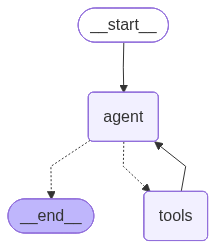

In [30]:
# 9. 그래프 시각화 (선택사항)
try:
    from IPython.display import Image, display
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"그래프 시각화 실패: {e}")
    print("그래프 구조:")
    print("START → agent → [도구 필요?] → tools → agent → END")

In [31]:
# 10. LangGraph Agent 실행 - 기존 agent.invoke()와 동일한 작업

# 입력 메시지 준비
input_message = HumanMessage(content="걸그룹 Geenius 멤버를 알려줘")
inputs = {"messages": [input_message]}

# Agent 실행 (스트리밍 방식으로 각 단계 확인)
print("=" * 50)
print("🤖 LangGraph Agent 실행 시작")
print("=" * 50)

for output in app.stream(inputs):
    for key, value in output.items():
        print(f"\n📍 노드: {key}")
        if "messages" in value:
            last_message = value["messages"][-1]
            if hasattr(last_message, "content") and last_message.content:
                print(f"💬 내용: {last_message.content}")
            if hasattr(last_message, "tool_calls") and last_message.tool_calls:
                print(f"🔧 도구 호출: {last_message.tool_calls}")
        print("-" * 50)

🤖 LangGraph Agent 실행 시작

📍 노드: agent
🔧 도구 호출: [{'name': 'wikipedia', 'args': {'query': '걸그룹 Geenius'}, 'id': 'call_AouXsfbZ17N98xbwHD9LqMQ9', 'type': 'tool_call'}]
--------------------------------------------------

📍 노드: tools
💬 내용: Page: Geenius
Summary: Geenius (Korean: 지니어스; RR: Jinieoseu) is a South Korean girl group under HOMe. The group consists of five members: Yeyoung, Sion, Mika, Zoe, and Andamiro. They made their debut on January 5, 2024, with the digital single "Voyage".

Page: 2024 in South Korean music
Summary: The following is a list of notable events and releases that have happened in 2024 in music in South Korea.

Page: Girls Planet 999
Summary: Girls Planet 999 (Korean: 걸스플래닛999: 소녀대전) is a 2021 South Korean reality competition show created by Mnet. It premiered on August 6, 2021, and was originally broadcast every Friday at 8:20 PM KST for the first eleven episodes until its finale on October 22, which was broadcast live at 8 PM KST. It was aired on the Mnet channel,

In [32]:
# 11. 최종 답변만 간단하게 확인

final_state = app.invoke(inputs)
final_message = final_state["messages"][-1]

print("\n" + "=" * 50)
print("✅ 최종 답변")
print("=" * 50)
print(final_message.content)



✅ 최종 답변
걸그룹 Geenius (지니어스)는 HOMe 소속의 한국 걸그룹으로, 2024년 1월 5일 디지털 싱글 "Voyage"로 데뷔했습니다. Geenius는 다음의 다섯 멤버로 구성되어 있습니다:

1. Yeyoung (예영)
2. Sion (시온)
3. Mika (미카)
4. Zoe (조이)
5. Andamiro (안다미로)


## 📊 기존 Agent vs LangGraph Agent 비교

### 기존 방식 (langchain_classic)
```python
from langchain_classic.agents import AgentType, initialize_agent, load_tools

tools = load_tools(['wikipedia', 'llm-math'], llm=model)
agent = initialize_agent(
    tools, model, 
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True, 
    verbose=True
)
result = agent.invoke('질문')
```

**특징**:
- ❌ Deprecated (더 이상 지원되지 않음)
- 간단하지만 커스터마이징 어려움
- Black box 방식 (내부 동작 불투명)

---

### 새로운 방식 (LangGraph)
```python
from langgraph.graph import StateGraph
from langgraph.prebuilt import ToolNode

# State, Tools, Nodes 정의
workflow = StateGraph(AgentState)
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)
app = workflow.compile()
result = app.invoke(inputs)
```

**특징**:
- ✅ 최신 권장 방식
- 완전한 커스터마이징 가능
- 각 단계를 명확하게 제어
- 그래프 시각화 가능
- 복잡한 워크플로우 구축 가능

---

### 핵심 차이점

| 항목 | 기존 (classic) | LangGraph |
|------|----------------|-----------|
| 상태 | 현재 권장되지 않음 | ✅ 권장 |
| 커스터마이징 | 제한적 | 완전 자유 |
| 투명성 | Black box | White box |
| 복잡도 | 간단 | 중간 |
| 학습 곡선 | 낮음 | 중간 |

---

### 💡 언제 LangGraph를 사용해야 하나?

1. **프로덕션 환경**: 안정적이고 유지보수가 쉬운 코드 필요
2. **복잡한 워크플로우**: 여러 단계, 조건부 분기, 루프 등
3. **완전한 제어**: Agent의 각 단계를 세밀하게 조정
4. **디버깅**: 각 노드의 상태를 명확히 확인
5. **장기 프로젝트**: 향후 업그레이드와 확장성 고려


In [ ]:
# 12. 추가 테스트 - Calculator 도구 사용 예제

# 계산 질문
calc_message = HumanMessage(content="123 곱하기 456은 얼마야?")
calc_inputs = {"messages": [calc_message]}

print("🧮 계산기 도구 테스트")
print("=" * 50)

final_calc = app.invoke(calc_inputs)
print(final_calc["messages"][-1].content)


In [ ]:
# 13. 직접 질문해보기 (Interactive)

def ask_agent(question: str):
    """Agent에게 질문하고 답변 받기"""
    user_message = HumanMessage(content=question)
    inputs = {"messages": [user_message]}
    
    result = app.invoke(inputs)
    final_answer = result["messages"][-1].content
    
    print(f"\n❓ 질문: {question}")
    print(f"✅ 답변: {final_answer}\n")
    return final_answer

# 예제 질문들
print("=" * 60)
print("🎯 LangGraph Agent 테스트")
print("=" * 60)

# 질문 1: Wikipedia 검색
ask_agent("BTS의 리더는 누구야?")

# 질문 2: 계산
ask_agent("1000을 7로 나눈 값은?")

# 질문 3: 복합 질문
ask_agent("아인슈타인이 노벨상을 받은 해와 그 해에 100을 더하면?")


## 🎓 LangGraph Agent 학습 요약

### 📌 핵심 개념

#### 1. **State (상태)**
```python
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
```
- Agent가 대화 내역을 관리하는 방식
- `messages`는 계속 누적됨 (`operator.add`)

---

#### 2. **Nodes (노드)**
- **Agent 노드**: LLM이 다음 행동 결정
- **Tools 노드**: 실제 도구 실행 (Wikipedia, Calculator 등)

```python
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)
```

---

#### 3. **Edges (엣지)**
- **일반 엣지**: 무조건 다음 노드로 이동
- **조건부 엣지**: 조건에 따라 경로 결정

```python
# 조건부: 도구 호출 필요 여부에 따라 분기
workflow.add_conditional_edges("agent", should_continue)

# 일반: tools 실행 후 무조건 agent로
workflow.add_edge("tools", "agent")
```

---

#### 4. **실행 흐름**

```
사용자 질문
    ↓
[Agent 노드]
    ├─ 도구 필요? → [Tools 노드] → [Agent 노드] → ...
    └─ 답변 가능? → [END]
```

---

### 🔧 구현 단계

1. **State 정의**: 상태 구조 설계
2. **Tools 준비**: 사용할 도구 정의
3. **Nodes 구현**: Agent, Tools 노드 함수 작성
4. **Graph 구성**: StateGraph로 워크플로우 연결
5. **Compile**: 실행 가능한 app으로 컴파일
6. **실행**: `app.invoke()` 또는 `app.stream()`

---

### 💡 실무 팁

1. **디버깅**: `app.stream()`으로 각 단계 확인
2. **커스터마이징**: 노드/엣지를 자유롭게 추가/수정
3. **도구 확장**: 새로운 Tool 쉽게 추가 가능
4. **시각화**: `app.get_graph().draw_mermaid_png()`로 그래프 확인
5. **에러 핸들링**: 각 노드에서 try-except 추가

---

### 📚 더 학습하기

- [LangGraph 공식 문서](https://langchain-ai.github.io/langgraph/)
- [LangGraph Examples](https://github.com/langchain-ai/langgraph/tree/main/examples)
- Agent 패턴: ReAct, Plan-and-Execute, Multi-Agent 등


## 📦 필요한 패키지 설치

LangGraph Agent를 실행하기 위해 필요한 패키지:

```bash
# LangGraph (필수)
pip install langgraph

# 이미 설치된 패키지들
pip install langchain
pip install langchain-openai
pip install langchain-community
pip install wikipedia

# 선택사항 (그래프 시각화)
pip install pygraphviz  # 또는
pip install graphviz
```

---

### 🔍 패키지별 역할

- **langgraph**: Agent 워크플로우 구성
- **langchain-core**: 기본 메시지, Runnable 등
- **langchain-community**: Wikipedia 등 커뮤니티 도구
- **wikipedia**: Wikipedia API 래퍼
- **pygraphviz**: 그래프 시각화 (선택사항)
